# Determinants and prediction of life expectancy

The data set used in this report was obtained from “data.worldbank.org”. This report’s stages of analysis encompass descriptive statistics, inferential statistics, machine learning, and deep learning. To understand this report, it is important to note that the word “dependent variable” has been used interchangeably with “target variable”, “dependent feature” or “Life expectancy”. The dependent variable is Life expectancy which is the average death age of individuals living in a country. Additionally, the word independent variable has been used interchangeably with “independent features” or “factors”. The factors investigated in this report are carbon monoxide emission, population, forest area, electric power consumption, GDP per capita, individuals using the internet, military expenditure, use of basic drinking water services, practice of open defecation, obesity among adults, and beer consumption. The analysis showed that while other features impact life expectancy at different rates, population and forest areas do not impact life expectancy in any way. Additionally, electric power consumption indicated a slight positive correlation with life expectancy but did not work well with any of the machine learning (ML) models. Hence, the uncertainty on the way in which the electricity consumed was generated opens a research gap as renewable power consumption might possibly improve life expectancy.

# Importing all required libaries

In [81]:
#Import important libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px

#for normalizing data
from sklearn import preprocessing

#Used for MLP Classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Used for MLP Regression
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix
from sklearn import tree

#For Linear regression
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm #For multiple linear regression

from sklearn.linear_model import LogisticRegression#For Logistics regression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score







# Reading the dataset

In [82]:
#Reading my data set
df = pd.read_csv("LifeExpectancy.csv")
#previewing my table
print('This is the data frame before normalization')
df.head()


This is the data frame before normalization


Country  Year Continent  Least Developed  Life Expectancy  Population  \
0  Albania  2000    Europe            False           73.955     3089027   
1  Albania  2001    Europe            False           74.288     3060173   
2  Albania  2002    Europe            False           74.579     3051010   
3  Albania  2003    Europe            False           74.828     3039616   
4  Albania  2004    Europe            False           75.039     3026939   

   CO2 emissions  Health expenditure  Electric power consumption  Forest area  \
0       1.026213            7.233370                 1414.703784    28.076642   
1       1.055496            7.139524                 1449.647413    28.123248   
2       1.232379            6.909341                 1351.230796    28.169854   
3       1.338985            7.063490                 1578.165919    28.216460   
4       1.404059            6.773372                 1469.264539    28.263066   

   GDP per capita  Individuals using the Internet  Military expenditure  \
0     3860.804627                        0.114097              1.246360   
1     4299.546493                        0.325798              1.309291   
2     4661.402695                        0.390081              1.320034   
3     5000.049363                        0.971900              1.336843   
4     5427.732662                        2.420388              1.381158   

   People practicing open defecation  \
0                           0.888853   
1                           0.836397   
2                           0.781899   
3                           0.728191   
4                           0.675281   

   People using at least basic drinking water services  Obesity among adults  \
0                                          86.754471                    12.8   
1                                          86.904070                    13.3   
2                                          87.451635                    13.9   
3                                          87.987194                    14.4   
4                                          88.510583                    15.0   

   Beer consumption per capita  
0                      1.33431  
1                      1.48995  
2                      1.28697  
3                      1.44830  
4                      1.37617

# Clean up and data validation

The data set is expected to contain 1904 records and 19 features (factors) assumed to affect human life expectancy across different countries between the years 2000 and 2015. 

In [83]:
#The code below shows the columns or features in my data set
print("the dataframe contains "+str(len(df))+" records with the collowing columns : ")
for c in df.columns:
    print(c)

the dataframe contains 1904 records with the collowing columns : 
Country
Year
Continent
Least Developed
Life Expectancy
Population
CO2 emissions
Health expenditure
Electric power consumption
Forest area
GDP per capita
Individuals using the Internet
Military expenditure
People practicing open defecation
People using at least basic drinking water services
Obesity among adults
Beer consumption per capita


In [84]:
#Upon describing 
#Ensuring that year is also an object not integer
df[["Year"]] = df[["Year"]].astype(str)

In [85]:
#Confirm that all columns and cells are completely filled and there are no empty cells
print(df.isnull().sum())

Country                                                0
Year                                                   0
Continent                                              0
Least Developed                                        0
Life Expectancy                                        0
Population                                             0
CO2 emissions                                          0
Health expenditure                                     0
Electric power consumption                             0
Forest area                                            0
GDP per capita                                         0
Individuals using the Internet                         0
Military expenditure                                   0
People practicing open defecation                      0
People using at least basic drinking water services    0
Obesity among adults                                   0
Beer consumption per capita                            0
dtype: int64


In [86]:
#Just Ensuring we have a total of 119 rows for each year, this mean each year speaks to a country
expected = 119
for yr in df.Year.unique():
    count = len(df[df["Year"] == yr])
    # check if number is greater than 0
    if count != expected:
        raise Exception("There is a missing years in data set : "+yr+" has only "+str(count))

print("All years are complete ")

#Code Customized by David Oku(MasterOfLogic)
#Youtube Channel https://www.youtube.com/@masteroflogic
#LinkedIn https://www.linkedin.com/in/masteroflogic/
#Github https://github.com/MasterOfLogic1

All years are complete 


In [87]:
#Just Ensuring we have a total of 16 rows for each country, this means we have 16 countrie
expected = 16
for cntry in df.Country.unique():
    count = len(df[df["Country"] == cntry])
    # check if number is greater than 0
    if count != expected:
        raise Exception("There are missing countries in data set : "+cntry+" has only "+str(count))
        break

print("All countries are complete ....")

#Code Customized by David Oku(MasterOfLogic)
#Youtube Channel https://www.youtube.com/@masteroflogic
#LinkedIn https://www.linkedin.com/in/masteroflogic/
#Github https://github.com/MasterOfLogic1

All countries are complete ....


# Describing the data

	The average life expectancy of the population is 70 years.
	The life expectancy with a standard deviation of 8.4 years indicates that there is a significant amount of average variability when we compare any given life expectancy variable to the average life expectancy in the data set. 
	75% percentile at 76.7 for life expectancy indicates that 75% of the countries in this population have a life expectancy less than or equal to 76.7yrs. 
	25% percentile at 66.8 for life expectancy indicates that 25% of the countries in this population have a life expectancy less than or equal to 66.8yrs.
	This clearly indicates that some countries might not be aligned with sustainable goals development 3 which emphasizes promoting healthy lives for all ages.
	The 50% percentile indicates the median cutting the data set in half. 


In [88]:
#Describing the data again , we have
df.describe()

Life Expectancy    Population  CO2 emissions  Health expenditure  \
count      1904.000000  1.904000e+03    1904.000000         1904.000000   
mean         70.817343  5.075583e+07       5.356796            6.096855   
std           8.489200  1.650247e+08       6.218898            2.451488   
min          43.065000  3.331660e+05       0.032419            0.410000   
25%          66.857250  4.218751e+06       1.001108            4.214776   
50%          73.009500  1.076918e+07       3.545525            5.862418   
75%          76.765402  3.692124e+07       7.629088            7.880948   
max          83.229268  1.379860e+09      50.954034           16.524073   

       Electric power consumption  Forest area  GDP per capita  \
count                 1904.000000  1904.000000     1904.000000   
mean                  3795.909462    30.547158    18094.113142   
std                   4546.577231    20.855899    19389.828835   
min                     22.755823     0.000000      434.835252   
25%                    605.280403    11.630910     4614.709959   
50%                   2143.657892    30.888136    11155.012085   
75%                   5407.221626    46.671068    26366.811600   
max                  25590.689430    91.978112   141634.703800   

       Individuals using the Internet  Military expenditure  \
count                     1904.000000           1904.000000   
mean                        29.736220              2.206872   
std                         27.773360              2.969809   
min                          0.000168              0.000000   
25%                          5.000000              1.087925   
50%                         20.000000              1.532535   
75%                         51.824997              2.414676   
max                         96.810326             32.655671   

       People practicing open defecation  \
count                        1904.000000   
mean                            9.511306   
std                            17.352796   
min                             0.000000   
25%                             0.000000   
50%                             0.750000   
75%                            10.496432   
max                            86.799174   

       People using at least basic drinking water services  \
count                                        1904.000000     
mean                                           86.836539     
std                                            17.603121     
min                                            18.085445     
25%                                            82.268573     
50%                                            94.881928     
75%                                            99.500000     
max                                           100.000005     

       Obesity among adults  Beer consumption per capita  
count           1904.000000                  1904.000000  
mean              16.213393                     2.199408  
std                8.213384                     1.903435  
min                1.100000                     0.000000  
25%                8.600000                     0.484170  
50%               18.000000                     1.791200  
75%               22.300000                     3.720080  
max               36.700000                     7.877850

# Normalization

now normalizting the data
Normalization places the features of the data on a smaller scale, 
thus making it easy for machine learning algorithms to perform better and converge more quickly. 
Additionally, normalization reduces the sensitivity of the training process to the magnitude of the features 
and which improves coefficients.
Assuming same lines from your example

In [89]:
cols_to_norm = ['Life Expectancy','Population','CO2 emissions','Health expenditure','Electric power consumption','Forest area','GDP per capita','Individuals using the Internet','Military expenditure','People practicing open defecation','People using at least basic drinking water services','Obesity among adults','Beer consumption per capita']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
print('This is the data frame after normalization')
df.head()

This is the data frame after normalization


Country  Year Continent  Least Developed  Life Expectancy  Population  \
0  Albania  2000    Europe            False         0.769092    0.001998   
1  Albania  2001    Europe            False         0.777383    0.001977   
2  Albania  2002    Europe            False         0.784628    0.001970   
3  Albania  2003    Europe            False         0.790827    0.001962   
4  Albania  2004    Europe            False         0.796081    0.001953   

   CO2 emissions  Health expenditure  Electric power consumption  Forest area  \
0       0.019516            0.423442                    0.054441     0.305254   
1       0.020091            0.417618                    0.055808     0.305760   
2       0.023565            0.403333                    0.051959     0.306267   
3       0.025658            0.412899                    0.060834     0.306774   
4       0.026936            0.394895                    0.056575     0.307280   

   GDP per capita  Individuals using the Internet  Military expenditure  \
0        0.024263                        0.001177              0.038167   
1        0.027371                        0.003364              0.040094   
2        0.029933                        0.004028              0.040423   
3        0.032332                        0.010037              0.040938   
4        0.035360                        0.025000              0.042295   

   People practicing open defecation  \
0                           0.010240   
1                           0.009636   
2                           0.009008   
3                           0.008389   
4                           0.007780   

   People using at least basic drinking water services  Obesity among adults  \
0                                           0.838301                0.328652   
1                                           0.840127                0.342697   
2                                           0.846811                0.359551   
3                                           0.853350                0.373596   
4                                           0.859739                0.390449   

   Beer consumption per capita  
0                     0.169375  
1                     0.189132  
2                     0.163366  
3                     0.183845  
4                     0.174689

For visualization I have used Pie charts , Histograms and bar charts

# Visualization - Histogram

•	Life Expectancy and people using basic drinking water services are skewed left.
•	Carbon monoxide emission, population, electric power consumption, GDP per capita, individuals using the internet, military expenditure, and beer consumption per capita are skewed left.
•	Health expenditure is normally distributed. 
•	Forest Area and obesity among adults are bimodal.


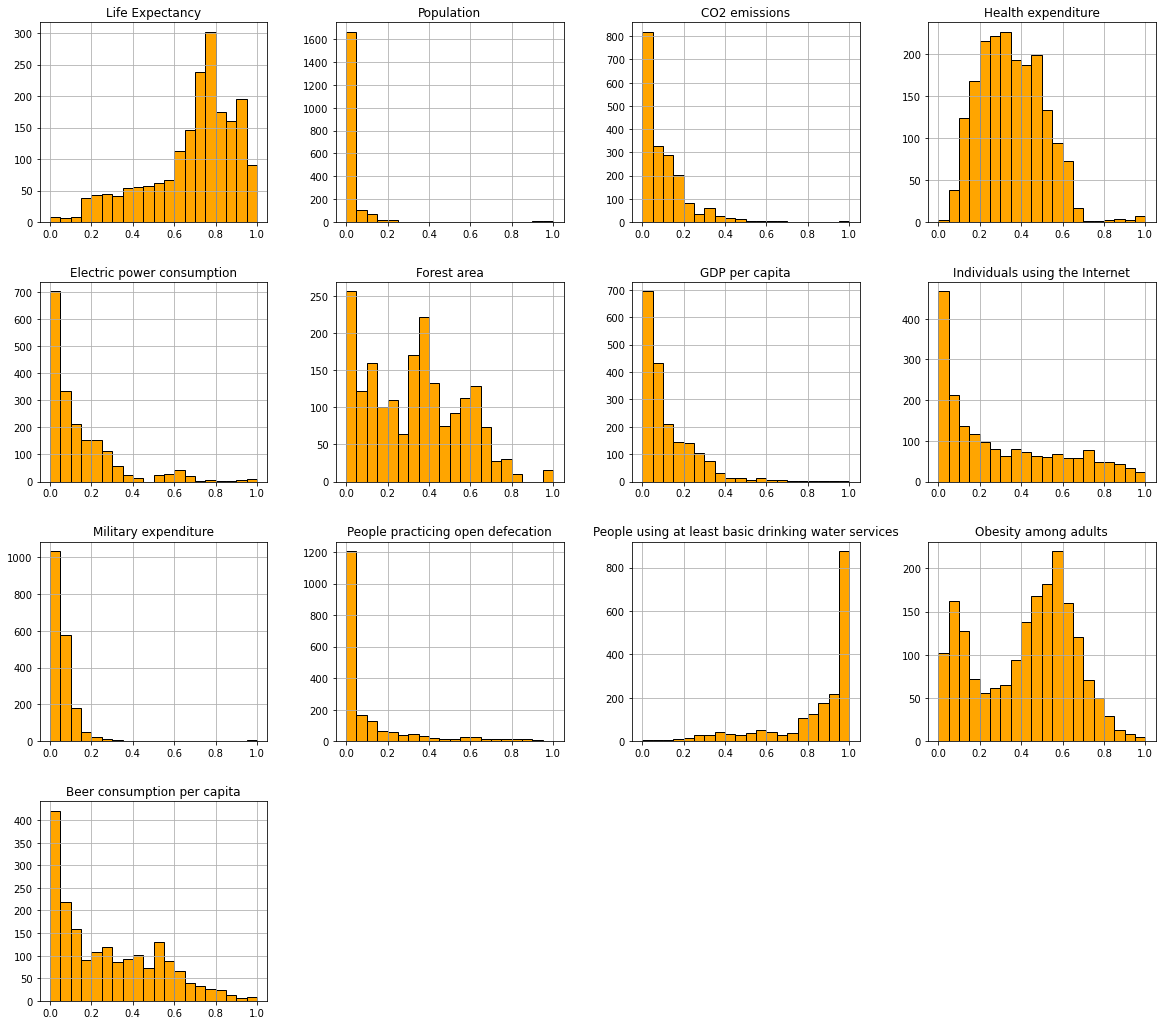

In [90]:
#Now for visualization lets 
df.hist(bins = 20, figsize = (20, 18), color = 'orange', edgecolor = 'black');
#fig.savefig("Life_Expectancy_Histogram.png")

# Visulization - Pie Chart

The pie charts indicate that countries in Oceania have the highest life expectancy and African countries have the lowest life expectancy.
Observing other features of the data on the pie chart, we notice that Africa when compared to Oceania has a higher population, Forest area, military expenditure, and open defecation rate.
On the other hand, Oceania when compared to Africa has a higher carbon monoxide emission level, Health expenditure, electric power consumption, gross domestic product, use of the internet, obesity, and beer consumption.
Notwithstanding that health-impacting features like obesity, alcohol consumption, and are higher in Oceania, we can infer that the continent maintains a high life expectancy rate due to its investment in health expenditure. 
In a continent like Africa, a high rate of open defecation causes disease outbreaks that low-level health expenditure cannot manage.
We notice a relationship between life expectancy and the given independent qualitative features.


In [91]:
# using a dictionary to map all years to the respective data frame
Continents = df.Continent.unique()
pan = {}
for Continent in Continents:
    dfTemp = df[df["Continent"] == Continent]
    pan[Continent] = dfTemp
    
#Code Customized by David Oku(MasterOfLogic)
#Youtube Channel https://www.youtube.com/@masteroflogic
#LinkedIn https://www.linkedin.com/in/masteroflogic/
#Github https://github.com/MasterOfLogic1

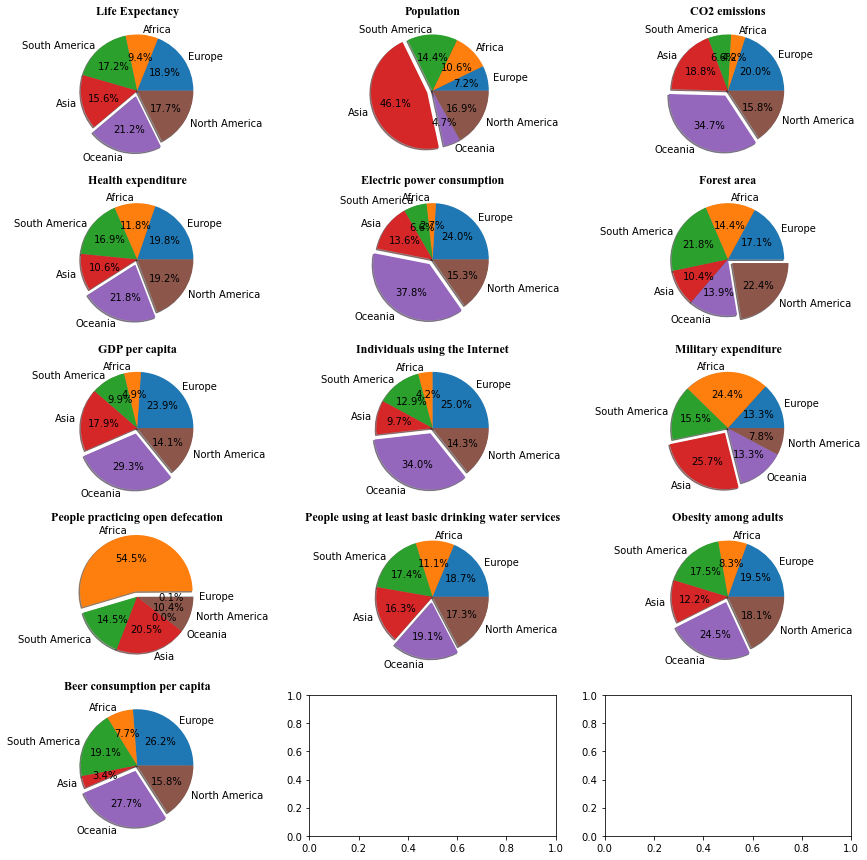

In [92]:
# get lables from table
labels = list(pan.keys())

#plot pie chart
fig, axs = plt.subplots(5, 3, figsize=(15, 15))

explodeMap = {
    'Europe' : (0.1, 0, 0, 0,0,0),
    'Africa' : (0, 0.1, 0, 0,0,0),
    'South America' : (0, 0, 0.1, 0,0,0),
    'Asia' : (0, 0, 0, 0.1,0,0),
    'Oceania' : (0, 0, 0, 0,0.1,0),
    'North America' : (0, 0, 0, 0,0,0.1),  
}


#pair dictionary to hold column name ato axis
s = {
    'Life Expectancy' : (0,0),
    'Population' : (0,1),
    'CO2 emissions' : (0,2),
    'Health expenditure' : (1,0),
    'Electric power consumption' : (1,1),
    'Forest area' : (1,2),
    'GDP per capita' : (2,0),
    'Individuals using the Internet' : (2,1),
    'Military expenditure' : (2,2),
    'People practicing open defecation' : (3,0),
    'People using at least basic drinking water services' : (3,1),
    'Obesity among adults' : (3,2),
    'Beer consumption per capita' : (4,0)
    
}
#loop via column name
for column in s.keys():
    sizes = []
    ContinentWithMaxMean = ''
    maxMean = 0
    for Continent in Continents:
        val = pan.get(Continent)[column].mean()
        sizes.append(val)
        if (val > maxMean) :
            maxMean = val
            ContinentWithMaxMean = Continent
        
    #Pragmatically get exploded pie
    explode = explodeMap.get(ContinentWithMaxMean)    
    # Shift the second slice using explode    
    axs[s.get(column)].pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, explode=explode)
    axs[s.get(column)].set_title(column,fontname="Times New Roman", size=12,fontweight="bold")


plt.show()
fig.savefig("Life_Expectancy_By_Continents_pie_chat.png")

#Initial Idea From : Matpoltlib documentation
#Code Customized by David Oku(MasterOfLogic)
#Youtube Channel https://www.youtube.com/@masteroflogic
#LinkedIn https://www.linkedin.com/in/masteroflogic/
#Github https://github.com/MasterOfLogic1

# Visualization - Customized Stacked-Barchart

[0.83763435 0.41463336 0.76114545 0.68979385 0.93604826 0.78257636]
['Europe', 'Africa', 'South America', 'Asia', 'Oceania', 'North America']


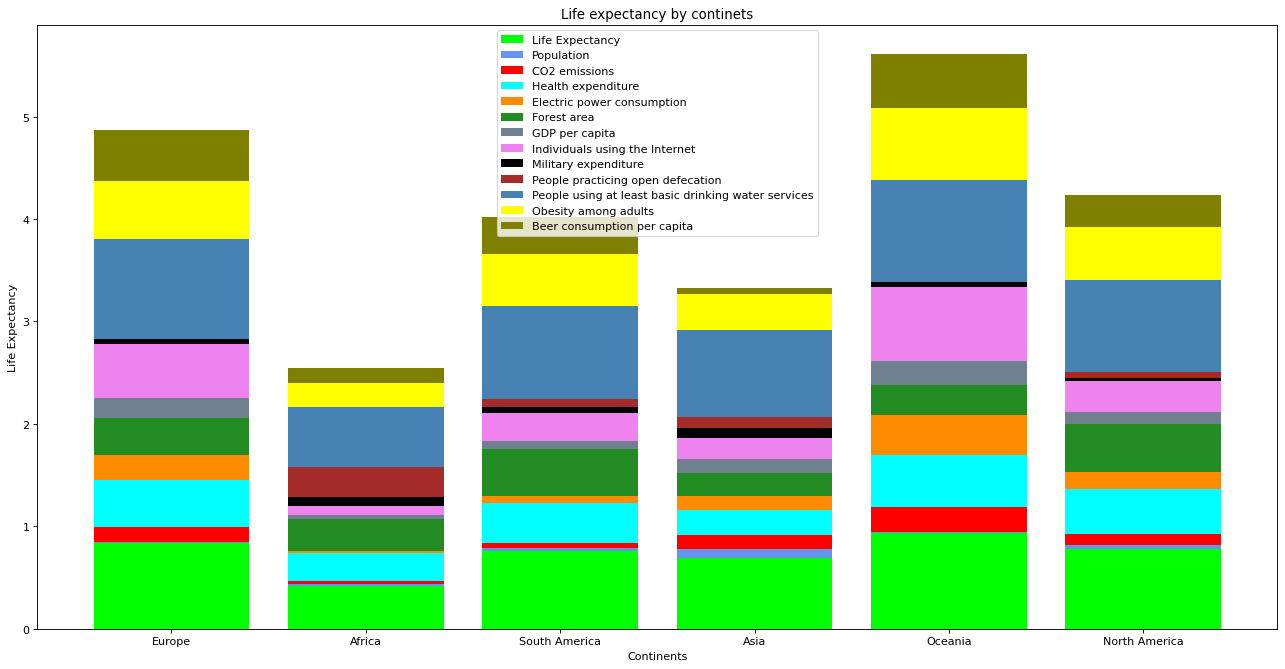

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 10), dpi=80)


features = ['Life Expectancy'
           ,'Population'
           ,'CO2 emissions'
           ,'Health expenditure'
           ,'Electric power consumption'
           ,'Forest area'
           ,'GDP per capita'
           ,'Individuals using the Internet'
           ,'Military expenditure'
           ,'People practicing open defecation'
           ,'People using at least basic drinking water services'
           ,'Obesity among adults'
           ,'Beer consumption per capita']

continents = ['Europe','Africa','South America','Asia','Oceania','North America']

fMap = {'Life Expectancy':[]
           ,'Population':[]
           ,'CO2 emissions':[]
           ,'Health expenditure':[]
           ,'Electric power consumption':[]
           ,'Forest area':[]
           ,'GDP per capita':[]
           ,'Individuals using the Internet':[]
           ,'Military expenditure':[]
           ,'People practicing open defecation':[]
           ,'People using at least basic drinking water services':[]
           ,'Obesity among adults':[]
           ,'Beer consumption per capita':[]}

# importing package
import matplotlib.pyplot as plt
import numpy as np

# create data
x = continents


for c in continents:
    dfTemp = df[df['Continent'] == c]
    for f in features:
        fMap[f].append(dfTemp[f].mean())

y1 = np.array(fMap['Life Expectancy'])
y2 = np.array(fMap['Population'])
y3 = np.array(fMap['CO2 emissions'])
y4 = np.array(fMap['Health expenditure'])
y5 = np.array(fMap['Electric power consumption'])
y6 = np.array(fMap['Forest area'])
y7 = np.array(fMap['GDP per capita'])
y8 = np.array(fMap['Individuals using the Internet'])
y9 = np.array(fMap['Military expenditure'])
y10 = np.array(fMap['People practicing open defecation'])
y11 = np.array(fMap['People using at least basic drinking water services'])
y12 = np.array(fMap['Obesity among adults'])
y13 = np.array(fMap['Beer consumption per capita'])

print(y1)
print(x)
# plot bars in stack manner
plt.bar(x, y1, color='lime')
plt.bar(x, y2, bottom=y1, color='cornflowerblue')
plt.bar(x, y3, bottom=y1+y2, color='red')
plt.bar(x, y4, bottom=y1+y2+y3, color='cyan')
plt.bar(x, y5, bottom=y1+y2+y3+y4, color='darkorange')
plt.bar(x, y6, bottom=y1+y2+y3+y4+y5, color='forestgreen')

plt.bar(x, y7, bottom=y1+y2+y3+y4+y5+y6, color='slategrey')
plt.bar(x, y8, bottom=y1+y2+y3+y4+y5+y6+y7, color='violet')
plt.bar(x, y9, bottom=y1+y2+y3+y4+y5+y6+y7+y8, color='black')
plt.bar(x, y10, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9, color='brown')
plt.bar(x, y11, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10, color='steelblue')
plt.bar(x, y12, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11, color='yellow')
plt.bar(x, y13, bottom=y1+y2+y3+y4+y5+y6+y7+y8+y9+y10+y11+y12, color='olive')

plt.xlabel("Continents")
plt.ylabel("Life Expectancy")
plt.legend(features)
plt.title("Life expectancy by continets")
plt.show()
#Initial Idea From : Matpoltlib documentation
#Code Customized by David Oku(MasterOfLogic)
#Youtube Channel https://www.youtube.com/@masteroflogic
#LinkedIn https://www.linkedin.com/in/masteroflogic/
#Github https://github.com/MasterOfLogic1

From the customized stacked bar chat you will notice african has the smallest life expectancy with the following features
1.)Smallest health expenditure
2.)Smallest electric power consumption
3.)Smallest number of individual using the internet
4.)Largest number of people practicing open defecation
5.)Smallest GDP
6.)Smallest number of people using basic drinking water services.

By visualization only, it might be okay to say these factors have resulted in the decrease of life expectancy in africa, but we would take a further step to analyze all the features in this data set to know what factor actually correlates with life expectancy and how they respond with the several machine learning techniques. This would help us know if the intensity of a feature actually affects life expectancy.


In [94]:
fig=px.line(df.sort_values(by='Year'),x='Continent',y='Life Expectancy',animation_frame='Year',animation_group='Year',color='Continent',markers=True)
fig.show()
#This code below is a special animation and it was gotten from kaggle
#Code from : https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who

# Visualization - Times Series

The time series is an indication that life expectancy follows an upward trend and will continue to improve over time
This supports the following projections:
a)	In 25 years, cohort life expectancy at birth in the UK is projected to increase by 2.8 years to reach 90.4 years for boys and by 2.4 years to 92.6 years for girls born in 2043 (ONS, United Kingdom,2019)
b)	Globally, life expectancy has increased by more than 6 years between 2000 and 2019 – from 66.8 years in 2000 to 73.4 years in 2019.(World health organization,2019)


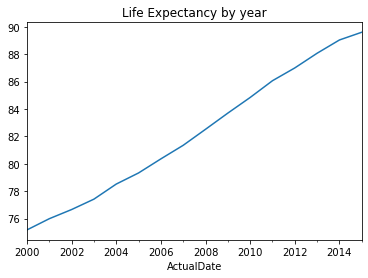

In [95]:
#Time Series
# create a date column while referencing a column is a data object or string
df['ActualDate'] = pd.to_datetime(df['Year'])
# Read in the csv file and display some of the basic info
#Graphing
pattern = df[['Life Expectancy','ActualDate']]

# Create a line chart showing TEY by month
pattern = pattern.set_index('ActualDate')
year_plot = pattern.resample('Y').sum().plot(title="Life Expectancy by year",legend=None)
fig_m = year_plot.get_figure()


#Show the image, then save it
plt.show()
fig_m.savefig("Life_Expectancy_Time_Series.png")

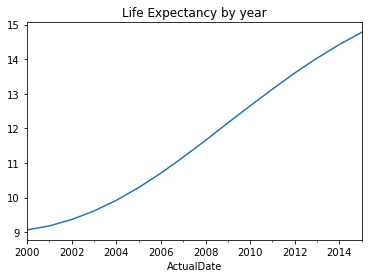

In [96]:
#Visulizing time series for africa only you notice there an obvious bend 
dttemp = df[df["Continent"]=='Africa']
pattern = dttemp[['Life Expectancy','ActualDate']]
# Create a line chart showing TEY by month
pattern = pattern.set_index('ActualDate')
year_plot = pattern.resample('Y').sum().plot(title="Life Expectancy by year",legend=None)
fig_m = year_plot.get_figure()
#Show the image, then save it
plt.show()
fig_m.savefig("Life_Expectancy_Time_Series_Africa.png")

In [97]:
#To calculate moving average
#First we need to align our data
#We need a table that contains the average life expectancy for each year
years = df.Year.unique()
results = []
for yr in years:
    dtTemp = df[df["Year"] == yr]
    results.append(dtTemp['Life Expectancy'].mean())
    

dataset = {'Year': list(years), 
                   'Life Expectancy': results}
dtn = pd.DataFrame(data=dataset)
#ensure year is a date column
dtn['ActualDate'] = pd.to_datetime(df['Year'])
#index the column
dtn = dtn.set_index("ActualDate")
dtn
#our new table looks like this:

Year  Life Expectancy
ActualDate                       
2000-01-01  2000         0.631692
2001-01-01  2001         0.638563
2002-01-01  2002         0.644185
2003-01-01  2003         0.650563
2004-01-01  2004         0.659813
2005-01-01  2005         0.666636
2006-01-01  2006         0.675270
2007-01-01  2007         0.683596
2008-01-01  2008         0.693415
2009-01-01  2009         0.703346
2010-01-01  2010         0.712940
2011-01-01  2011         0.723217
2012-01-01  2012         0.731061
2013-01-01  2013         0.740073
2014-01-01  2014         0.748210
2015-01-01  2015         0.752955

In [98]:
#To calculate simple moving average your dataset must have a date column here my date column is ActualDate and
dtn = dtn['2000':'2015'][['Life Expectancy']]
dtn.shape
#now calculating 3 years life expectancy
dtn['3yr Life Expectancy']=dtn['Life Expectancy'].rolling(window=3).mean().shift(1)
dtn


Life Expectancy  3yr Life Expectancy
ActualDate                                      
2000-01-01         0.631692                  NaN
2001-01-01         0.638563                  NaN
2002-01-01         0.644185                  NaN
2003-01-01         0.650563             0.638147
2004-01-01         0.659813             0.644437
2005-01-01         0.666636             0.651520
2006-01-01         0.675270             0.659004
2007-01-01         0.683596             0.667240
2008-01-01         0.693415             0.675167
2009-01-01         0.703346             0.684094
2010-01-01         0.712940             0.693452
2011-01-01         0.723217             0.703234
2012-01-01         0.731061             0.713168
2013-01-01         0.740073             0.722406
2014-01-01         0.748210             0.731451
2015-01-01         0.752955             0.739781

In [99]:
#To calculate simple moving average your dataset must have a date column here my date column is ActualDate and
dtn = dtn['2000':'2015'][['Life Expectancy']]
dtn.shape
#now calculating 7 years life expectancy
dtn['7yr Life Expectancy']=dtn['Life Expectancy'].rolling(window=7).mean().shift(1)
dtn

Life Expectancy  7yr Life Expectancy
ActualDate                                      
2000-01-01         0.631692                  NaN
2001-01-01         0.638563                  NaN
2002-01-01         0.644185                  NaN
2003-01-01         0.650563                  NaN
2004-01-01         0.659813                  NaN
2005-01-01         0.666636                  NaN
2006-01-01         0.675270                  NaN
2007-01-01         0.683596             0.652389
2008-01-01         0.693415             0.659804
2009-01-01         0.703346             0.667640
2010-01-01         0.712940             0.676091
2011-01-01         0.723217             0.685002
2012-01-01         0.731061             0.694060
2013-01-01         0.740073             0.703264
2014-01-01         0.748210             0.712521
2015-01-01         0.752955             0.721752

In [100]:
meanError = ((dtn['Life Expectancy']-dtn['7yr Life Expectancy'])**2).mean()**0.5
meanError
#we have our root mean square error

0.035226289388860625

# Correlation Heatmap

The correlation heatmap indiactes that Obesity Among adults, People using at least basic drinking water service, ,Beer consumption, individuals using the internet, GDP per capita,Electric power consumption, health expenditure,CO Emissions.

The following features have negative correlation : Parctice of open defecation

The features with positive correlation are :  Obesity Among adults, People using at least basic drinking water service, ,Beer consumption, individuals using the internet, GDP per capita,Electric power consumption, health expenditure,CO Emissions.

Military expenditure, forest area and population have very weak negative correlation

<AxesSubplot:>

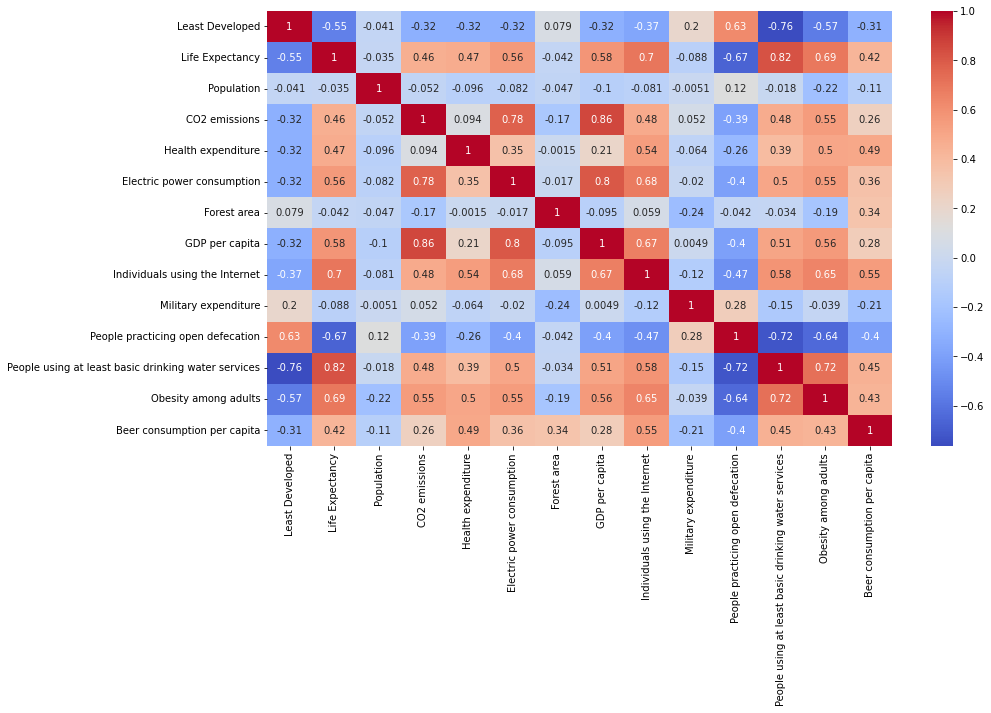

In [101]:
plt.figure(figsize=(14,8))
sb.heatmap(df.corr(), annot=True, cmap='coolwarm')

# scatter plots of all quantitative columns against target variable

The scatter plot indicates in a graph how all the variables relate with each other 

scatter plots of all quantitative columns against target variable


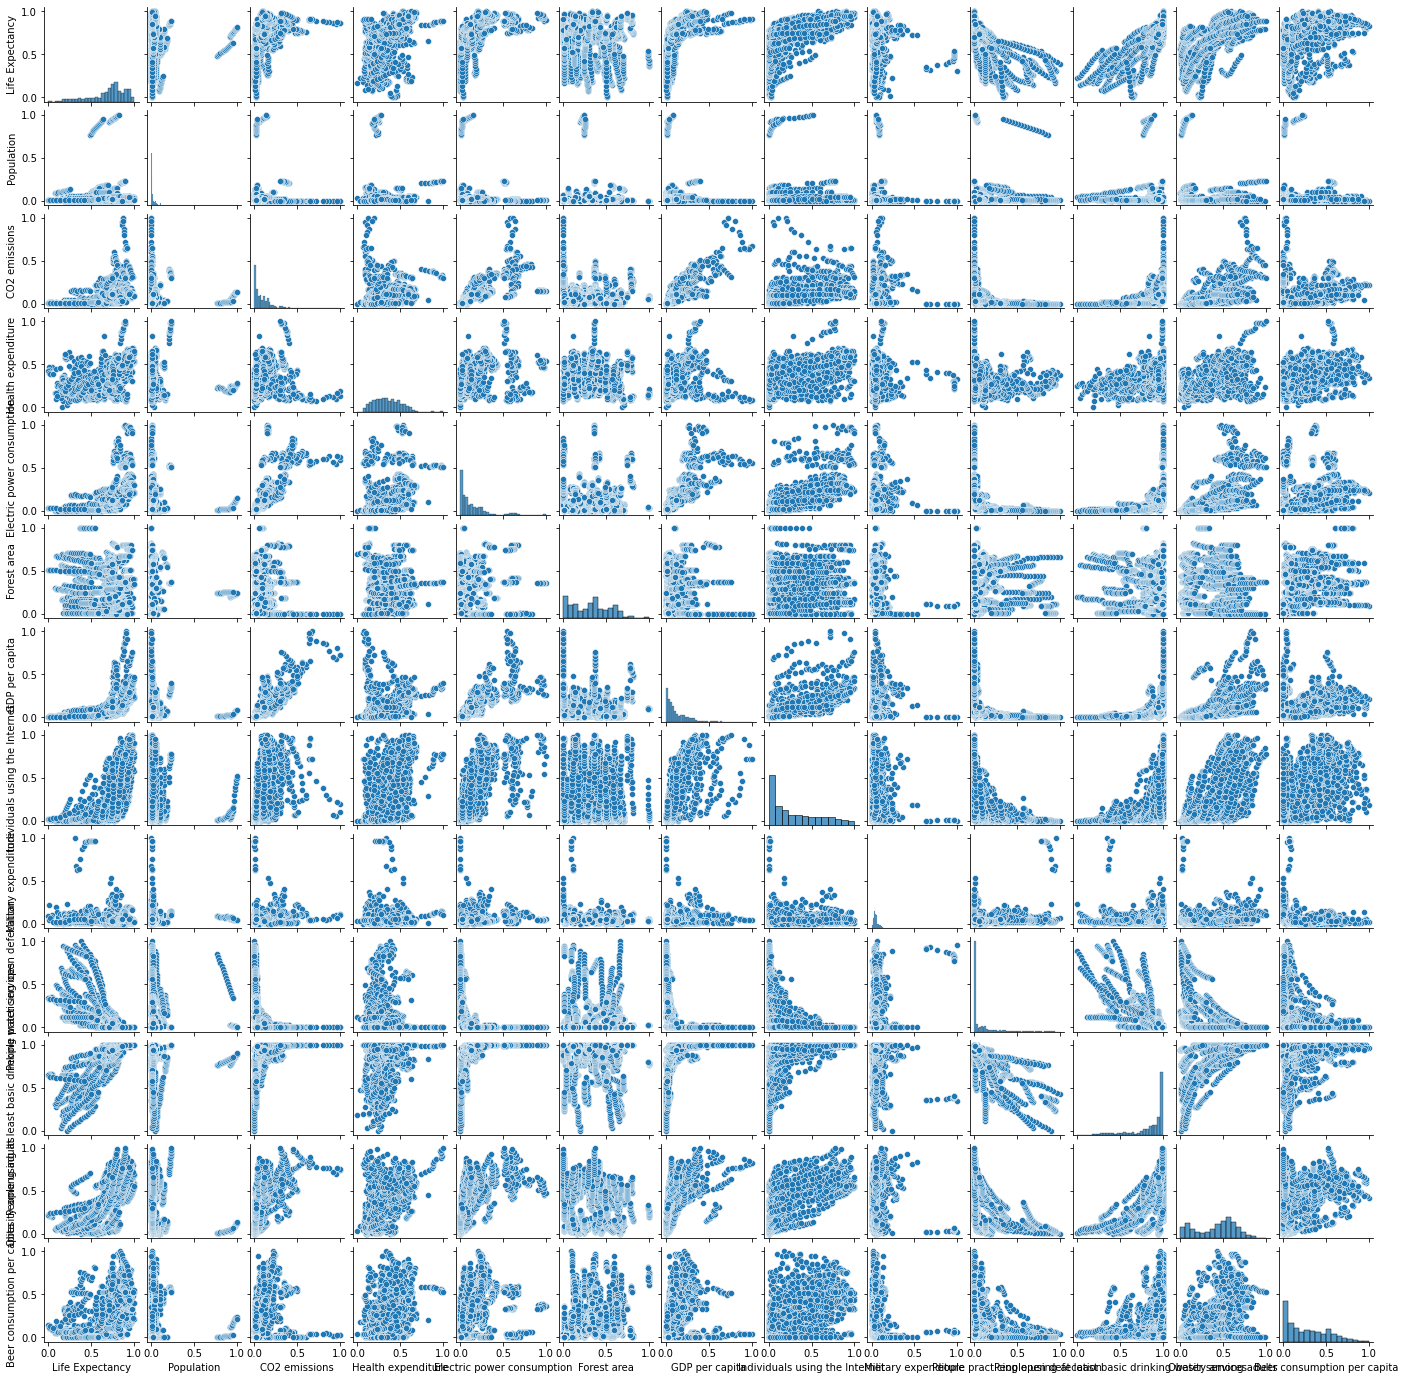

In [102]:
print('scatter plots of all quantitative columns against target variable')
try:
    columnsToDrop = ['Country','Year','Continent','Least Developed']
    df.drop(columnsToDrop, inplace=True, axis=1)
except:
  print("the columns have already been droped in preious execution")


sb.pairplot(df, height=1.5).savefig('Correlation_Graph.png', bbox_inches='tight', pad_inches=0.0)

# T-Test : Correlation

Note : in this correlation test we are using features that indicated a correlation on the correlation heat map 

With the T-test we can known the p value and correlation efficient, this is a more preffered way to tell us if a feature correlates with life expectancy :

•	To test the following hypothesis on each of the factors (Carbon monoxide emission, population, forest area, electric power consumption, GDP per capita, individuals using the internet, military expenditure, use of basic drinking water services, practice of open defecation, obesity among adults, and beer consumption):

•	Null Hypothesis (H0): A given factor is completely random and does not have any relationship with life expectancy.
•	Alternative Hypothesis (H1): A given factor is not random, hence there is a relationship between the factor and life expectancy.

The correlation heatmap indiactes that Obesity Among adults, People using at least basic drinking water service, ,Beer consumption, individuals using the internet, GDP per capita,Electric power consumption, health expenditure,CO Emissions.

Additinal, from the T- Test we find out that Military expenditure now correlates with life expectancy


In [103]:
#perform correlation
columnsCorrelating = []
columnsNotCorrelating = []
features = ['Population','CO2 emissions','Health expenditure','Electric power consumption','Forest area','GDP per capita','Individuals using the Internet','Military expenditure','People practicing open defecation','People using at least basic drinking water services','Obesity among adults','Beer consumption per capita']
for c in features:
    rvalue, pvalue = pearsonr(df[c],df['Life Expectancy'])
    print('stat=%.3f, p=%.3f' %(rvalue,pvalue))
    
    #confidence level is 99%, alpha = 0.01
    alpha_half = 0.005
    if pvalue > 0.005:
        print('For correlation between '+c+' and Life Expectancy')
        print('Accept the null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is equal to 0;')
        print('(ii) both variables are independent of each other;')
        print('(iii) both variables do not have any relationship;')
        columnsNotCorrelating.append(c)
    else:
        print('For correlation between '+c+' and Life Expectancy')
        print('Reject null hypothesis: the conclusions are:')
        print('(i) correlation coefficient ,r value is significantly different from 0;')
        print('(ii) both variables are dependent of each other;')
        print('(iii) both variables  have a relationship;')
        columnsCorrelating.append(c)
    print("\n")

stat=-0.035, p=0.132
For correlation between Population and Life Expectancy
Accept the null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is equal to 0;
(ii) both variables are independent of each other;
(iii) both variables do not have any relationship;


stat=0.463, p=0.000
For correlation between CO2 emissions and Life Expectancy
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.471, p=0.000
For correlation between Health expenditure and Life Expectancy
Reject null hypothesis: the conclusions are:
(i) correlation coefficient ,r value is significantly different from 0;
(ii) both variables are dependent of each other;
(iii) both variables  have a relationship;


stat=0.559, p=0.000
For correlation between Electric power consumption and Life Expectancy
Reject null hypothesis: the conclusions are:


# scatter plots of all correlating quantitative columns against target variable

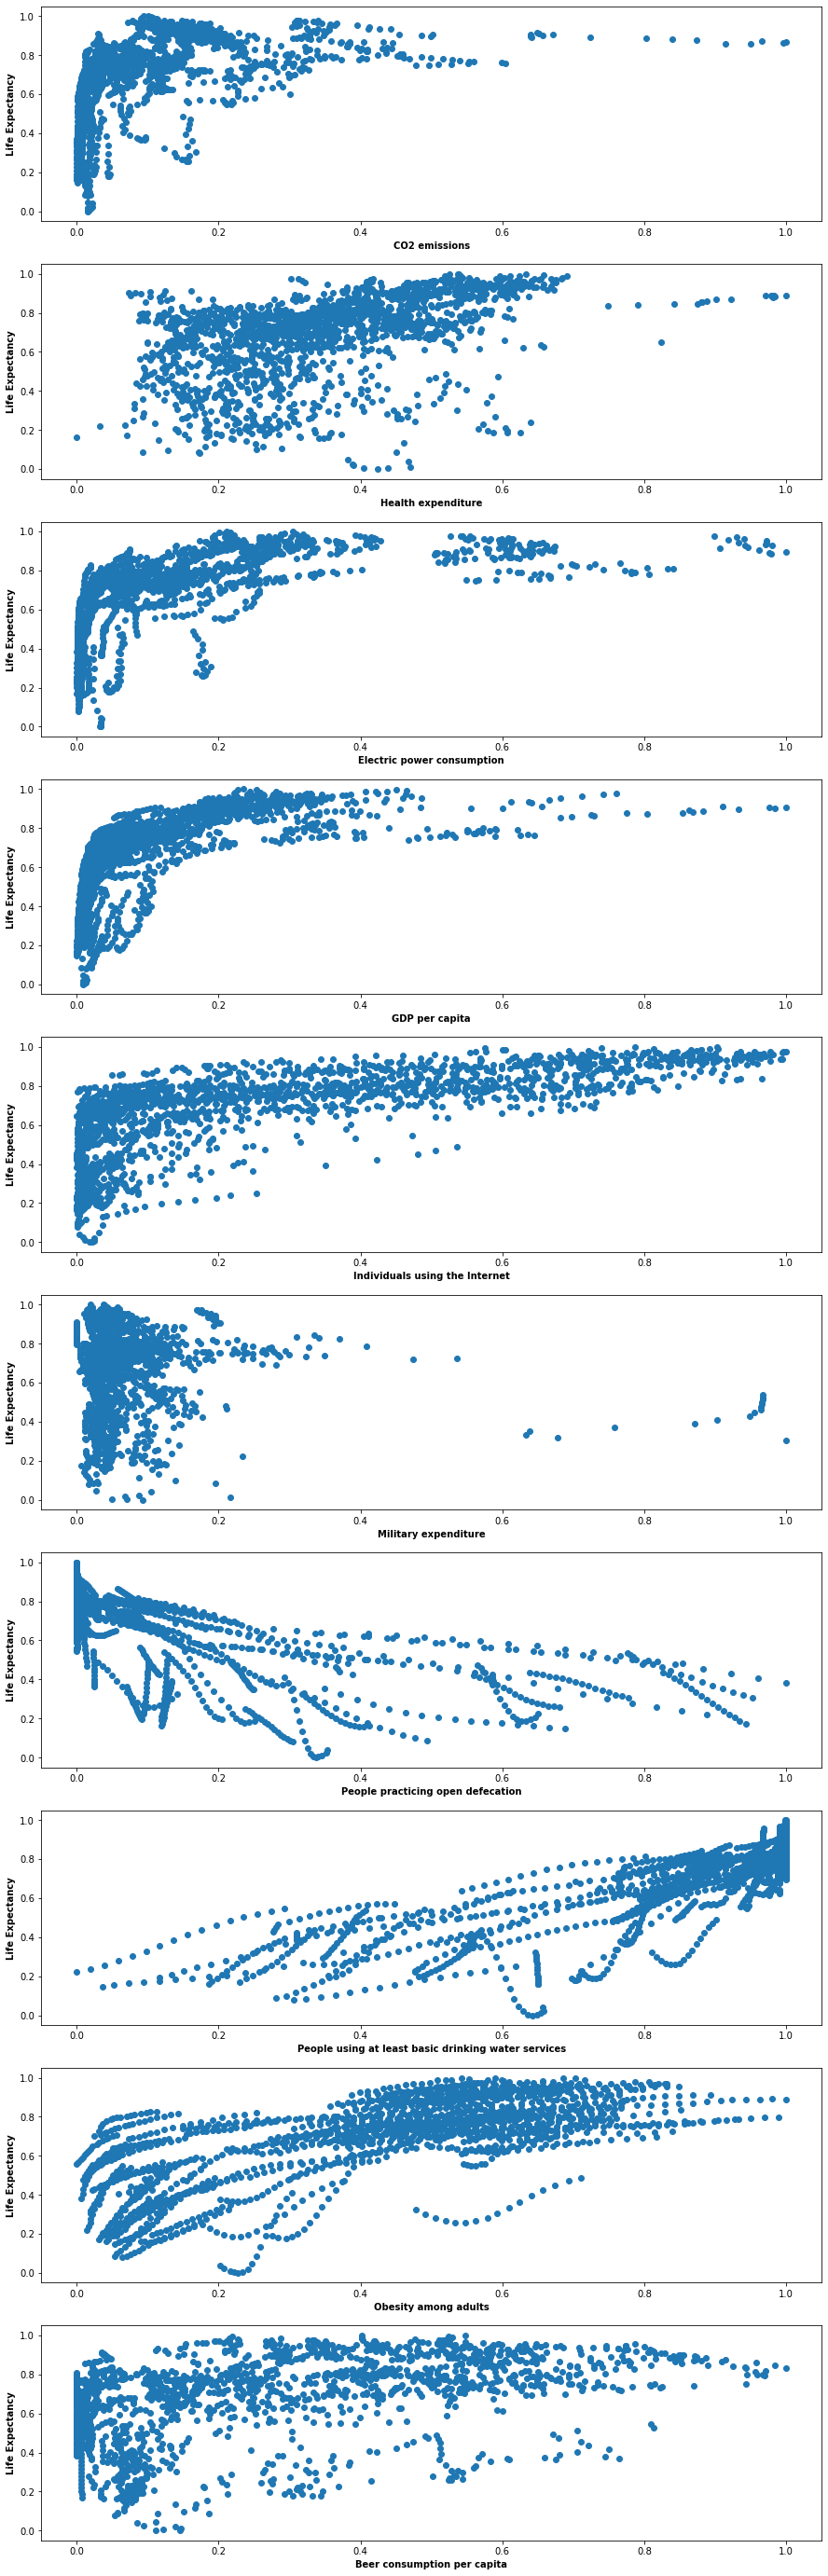

In [104]:
fig, ax = plt.subplots(len(columnsCorrelating), figsize=(15, 50))
for c in columnsCorrelating:
    i = columnsCorrelating.index(c)
    ax[i].scatter(x = df[c], y = df['Life Expectancy'])
    ax[i].set_xlabel(c,fontweight="bold")
    ax[i].set_ylabel("Life Expectancy",fontweight="bold")

plt.show()

From the correlation

Population stat=-0.035, p=0.132

CO2 emissions stat=0.463, p=0.000

Health expenditure stat=0.471, p=0.000

Electric power consumption stat=0.559, p=0.000

Forest area stat=-0.042, p=0.070

GDP per capita stat=0.575, p=0.000

Individuals using the Internet stat=0.699, p=0.000

Military expenditure stat=-0.088, p=0.000

People practicing open defecation stat=-0.668, p=0.000

People using at least basic drinking water services stat=0.824, p=0.000

Obesity among adults stat=0.695, p=0.000

Beer consumption per capita stat=0.425, p=0.000


--------------------------------------------------------------------------------------

From the correlation we select features for which null hypothesis was rejected i.e p = 0

CO2 emissions

Health expenditure

Electric power consumption

GDP per capita

Individuals using the Internet

Military expenditure

People practicing open defecation

People using at least basic drinking water services

Obesity among adults

Beer consumption per capita


--------------------------------------------------------------------------------------

Finally, the following features do not have any realtionship with life expectancy

Population

Forest area

# Creating a categorical target variable from a quantitative variable (The idea of OneHotEncoding)

	First it was noted that the average life expectancy recorded by the United Nations as of 2019 was 73.4 years.
	A new feature called life expectancy rating was introduced into the data frame and the values for the feature was computed by a simple python algorithm as show below:
•	Where Life expectancy > 73.4, then life expectancy rating = high (1)
•	Else, life expectancy rating = low (0)


In [105]:
#Accroding to the united nations the average life expectancy as at 2019 is  73.4 years.
#https://www.who.int/data/gho/data/themes/mortality-and-global-health-estimates/ghe-life-expectancy-and-healthy-life-expectancy
#Using this infomation , I will create a categorical feature on my data set
#I will create a categorical column called Life Expectancy Rating
#And I will say all columns with life expectancy below 73.4 years
#To do this I will say all life expectancy below 73.4 years is marked as Low
#and any life expectancy above or equal to 73.4 years be marked as high on the Rating Column
#This is acheived with the lamda code below
#and the table is previewed again
df["Life Expectancy Rating"] = df["Life Expectancy"].apply(lambda x: 0 if (x*100) < 73.4 else 1)
df.head()

Life Expectancy  Population  CO2 emissions  Health expenditure  \
0         0.769092    0.001998       0.019516            0.423442   
1         0.777383    0.001977       0.020091            0.417618   
2         0.784628    0.001970       0.023565            0.403333   
3         0.790827    0.001962       0.025658            0.412899   
4         0.796081    0.001953       0.026936            0.394895   

   Electric power consumption  Forest area  GDP per capita  \
0                    0.054441     0.305254        0.024263   
1                    0.055808     0.305760        0.027371   
2                    0.051959     0.306267        0.029933   
3                    0.060834     0.306774        0.032332   
4                    0.056575     0.307280        0.035360   

   Individuals using the Internet  Military expenditure  \
0                        0.001177              0.038167   
1                        0.003364              0.040094   
2                        0.004028              0.040423   
3                        0.010037              0.040938   
4                        0.025000              0.042295   

   People practicing open defecation  \
0                           0.010240   
1                           0.009636   
2                           0.009008   
3                           0.008389   
4                           0.007780   

   People using at least basic drinking water services  Obesity among adults  \
0                                           0.838301                0.328652   
1                                           0.840127                0.342697   
2                                           0.846811                0.359551   
3                                           0.853350                0.373596   
4                                           0.859739                0.390449   

   Beer consumption per capita ActualDate  Life Expectancy Rating  
0                     0.169375 2000-01-01                       1  
1                     0.189132 2001-01-01                       1  
2                     0.163366 2002-01-01                       1  
3                     0.183845 2003-01-01                       1  
4                     0.174689 2004-01-01                       1

# Machine Learning- Simple Linear Regression

For the simple linear regression only the features that return the lowest rott mean square error and high corefficient of determination is selected. it is expecetd that coeffcient of determination nearer 1 and root mean sqaure error nearer to 0.
To make this selection we run all the correlation columns on after the other in the regression model , from this we find out that the best fit for the model are 

1.) People practicing open defecation

2.) People using at least basic drinking water services

In [106]:
# Simple Linear Regression
#Looping through the list of correlating columns to display the adjusted R, 
#RMSE and coefficient of determination for each feature 
#this enables us to see results and select the best feature for the model
#this model works best for
#People practicing open defecation
#People using at least basic drinking water services


for c in columnsCorrelating:
    #Use only 1 feature - People using at least basic drinking water services to predict the target Life Expectancy(Y)
    print('for independent variable '+c)
    x = df[[c]]
    y = df[['Life Expectancy']]
    #The scatterplot evidence that seemingly there is a trend
    #plt.scatter(x, y)
    #Split the dataset into training and testing sets (80%:20%)
    x_train,x_test,y_train,y_test=train_test_split(x, y,test_size=0.2,random_state=40)
    #Create linear regression object
    regr = LinearRegression()
    # Train the model using the training sets and reshape 1D arrays
    regr.fit(x_train, y_train)
    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print('Mean squared error: ', mean_squared_error(y_test, y_pred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: ', r2_score(y_test, y_pred))
    print('The intercept is ',regr.intercept_)
    print("\n")


for independent variable CO2 emissions
Coefficients: 
 [[0.79972471]]
Mean squared error:  0.0338540964152782
Coefficient of determination:  0.2121533844282012
The intercept is  [0.60787795]


for independent variable Health expenditure
Coefficients: 
 [[0.63660138]]
Mean squared error:  0.03096074940589154
Coefficient of determination:  0.2794868504010616
The intercept is  [0.4675868]


for independent variable Electric power consumption
Coefficients: 
 [[0.65205209]]
Mean squared error:  0.02929907020164837
Coefficient of determination:  0.3181571584538917
The intercept is  [0.59442045]


for independent variable GDP per capita
Coefficients: 
 [[0.87965119]]
Mean squared error:  0.02843700676545348
Coefficient of determination:  0.33821894809031017
The intercept is  [0.58069775]


for independent variable Individuals using the Internet
Coefficients: 
 [[0.51654772]]
Mean squared error:  0.02159395632343755
Coefficient of determination:  0.49746922211316946
The intercept is  [0.531674

# Regression line of best fit for People practicing open defecation

Text(0.5, 20.80000000000002, 'People practicing open defecation')

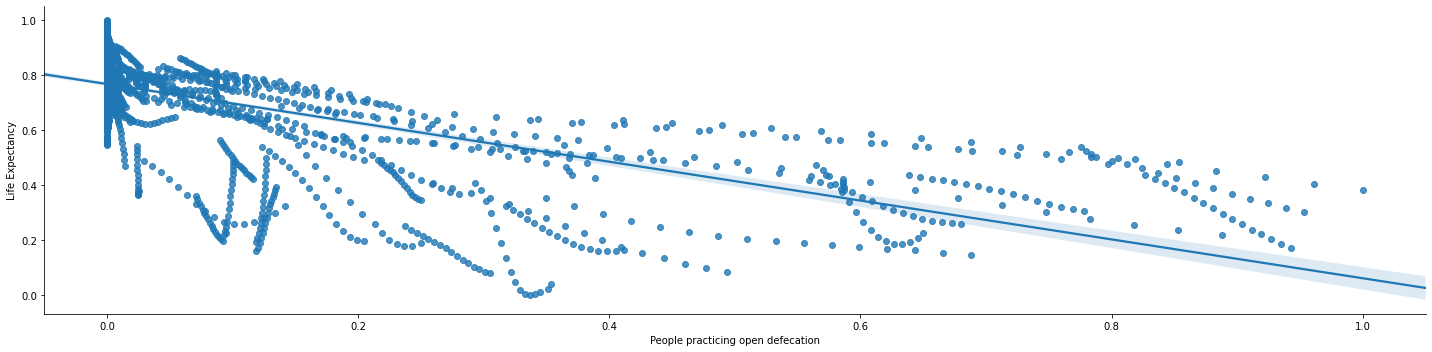

In [107]:
#Regression line of People practicing open defecation Against Life Expectancy
sb.lmplot(data=df, x="People practicing open defecation", y="Life Expectancy",height=5, aspect=4,truncate=False) #height=6, width=1.5 times larger than height
plt.ylabel('Life Expectancy')
plt.xlabel('People practicing open defecation')

# Regression line of best fit for People using at least basic drinking water services

Text(0.5, 20.80000000000002, 'People using at least basic drinking water services')

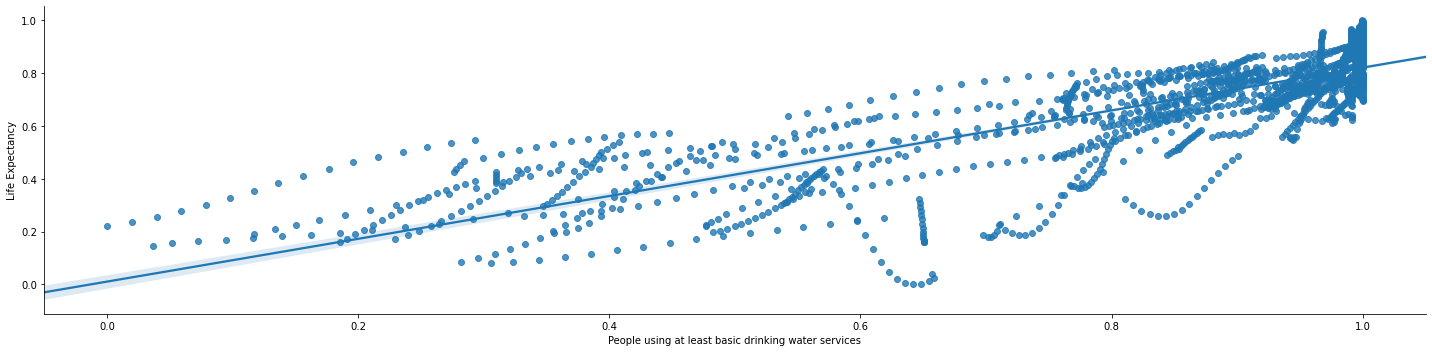

In [108]:
#Regression line of best fit for People using at least basic drinking water services

sb.lmplot(data=df, x="People using at least basic drinking water services", y="Life Expectancy",height=5, aspect=4,truncate=False) #height=6, width=1.5 times larger than height
plt.ylabel('Life Expectancy')
plt.xlabel('People using at least basic drinking water services')

Text(0.5, 20.80000000000002, 'Individuals using the Internet')

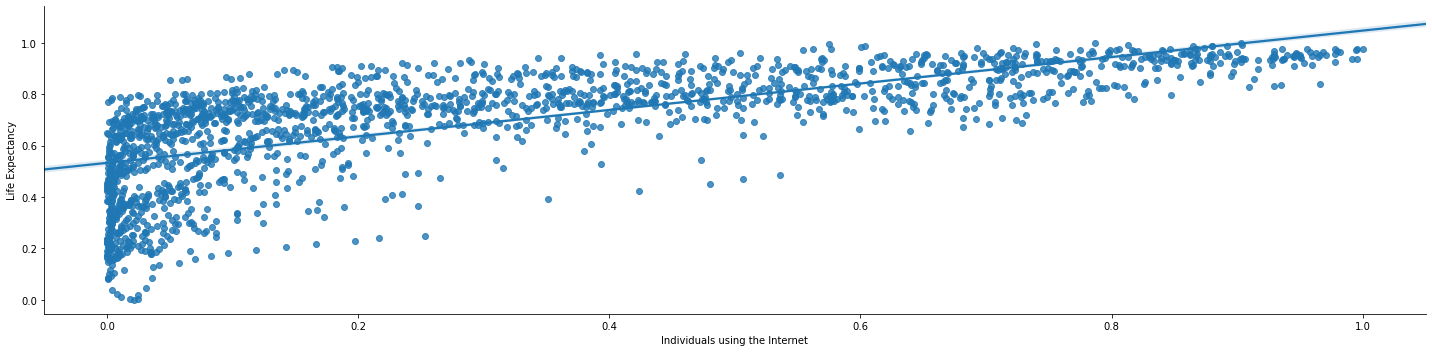

In [119]:
sb.lmplot(data=df, x="Individuals using the Internet", y="Life Expectancy",height=5, aspect=4,truncate=False) #height=6, width=1.5 times larger than height
plt.ylabel('Life Expectancy')
plt.xlabel('Individuals using the Internet')

Text(0.5, 20.80000000000002, 'Obesity among adults')

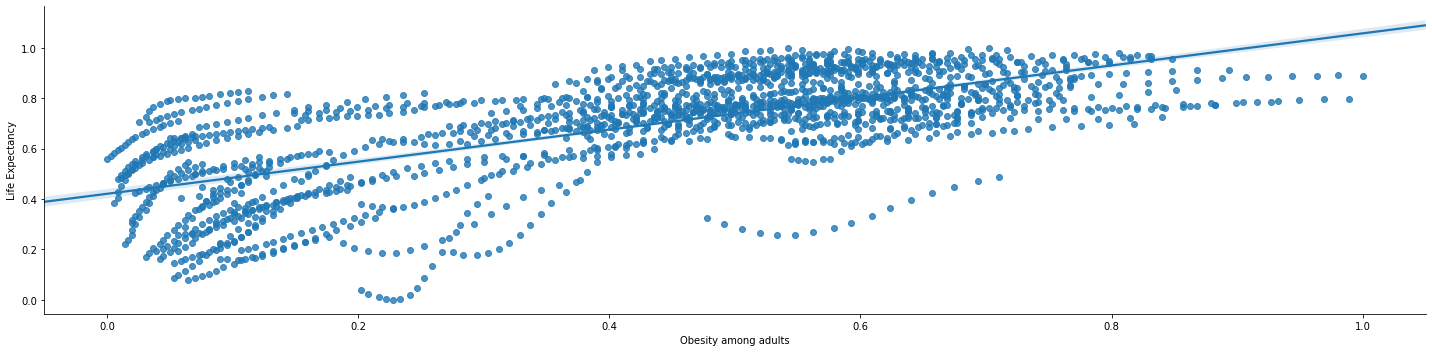

In [109]:
sb.lmplot(data=df, x="Obesity among adults", y="Life Expectancy",height=5, aspect=4,truncate=False) #height=6, width=1.5 times larger than height
plt.ylabel('Life Expectancy')
plt.xlabel('Obesity among adults')

# Machine Learning - Multiple Linear Regression

	To avoid over-fitting, only independent features which passed the T-test were used to train the model.
	The independent features were arranged in the order of correlation. i.e., from the highest to the lowest correlation coefficient.
	In the first step, we start with the features “People using at least basic drinking water services” & “Obesity among adults”.
	Then other independent features were taken simultaneously and added to the model.
	If the addition of an independent feature led to a reduction or no effect in the Adjusted R-squared value, then the feature was dropped. 
	The table below provides a summary of the order in which the independent variables were added and the corresponding effects on the RMSE, Adjusted R-Square value.
	Electric power consumption is dropped because its addition had no effect on the Adjusted R-squared value.
	The features that best fit the model are People using at least basic drinking water services, Obesity among adults, People practicing open defecation, Individuals using the Internet, GDP per capita, Health expenditure, CO2 emissions, and Beer consumption per capita.
	The final Mean squared error is 0.008785161974747538.
	Coefficient of determination is 0.7955532457829437.
	The adjusted R-square value is   0.7712742448821779



In [110]:
#Multiple Linear Regression Plot and the prediction model
feature_cols = ['People using at least basic drinking water services',
                'Obesity among adults',
                'People practicing open defecation',
                'Individuals using the Internet',
                'GDP per capita',
                'Health expenditure',
                'CO2 emissions',
                'Beer consumption per capita'
               ]
X = df[feature_cols] # Features
Y = df['Life Expectancy'] # Target variable
#Split the dataset into training and testing sets (80%:20%)
x_train,x_test,y_train,y_test=train_test_split(X, Y,test_size=0.2,random_state=40)
#Create linear regression object
regr = LinearRegression()
# Train the model using the training sets 
regr.fit(x_train, y_train)
# Make predictions using the testing set
y_pred = regr.predict(x_test)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: ', mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: ', r2_score(y_test, y_pred))
adjusted_Val = 1 - (1-regr.score(X, Y))*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('the adjusted val is :',adjusted_Val)
#Use statsmodel for model summary
X = sm.add_constant(Y)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)


Coefficients: 
 [ 0.52865428  0.01538122 -0.13933608  0.17478595  0.27126914  0.13317588
 -0.18103528 -0.06479777]
Mean squared error:  0.008785161974747538
Coefficient of determination:  0.7955532457829437
the adjusted val is : 0.7712742448821779
                            OLS Regression Results                            
Dep. Variable:        Life Expectancy   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.660e+32
Date:                Sun, 01 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:53:10   Log-Likelihood:                 65154.
No. Observations:                1904   AIC:                        -1.303e+05
Df Residuals:                    1902   BIC:                        -1.303e+05
Df Model:                           1                                         
Covariance Type:            nonrobust    

# Machine Learning - MLP(Multiple Layered Perceptron) Regression

	Here 4 hidden layers were used.
	To avoid overfitting and reduce the number of independent variables, only features that were suitable for the multiple linear regression was used here.
	 Just as performed earlier for the multiple linear regression, The independent features are arranged in the order of correlation. i.e., from the highest to the lowest correlation coefficient.
	We start with the features “People using at least basic drinking water services” & “Obesity among adults”.
	Then other independent features were taken simultaneously and added to the model.
	If the addition of an independent feature led to an increase in the RMSE or decrease in R-squared value, then the feature is dropped.
	The table below provides a summary of the order in which the independent variables were added and the corresponding effects on the RMSE, Adjusted R-Square value.
	The table below provides a summary of the order in which the independent variables were added and the corresponding effects on the RMSE, Adjusted R-Square value.
	The features Individuals using the internet, co2 emission and beer consumption were dropped because the addition of these features had little or no effect on the RMSE and R-squared value or the addition increased the RSME and reduced the R-Square value.
	The features that best fit the model are People using at least basic drinking water services, Obesity among adults, People practicing open defecation, GDP per capita, Health expenditure.
	The RMSE of the final model is 0.007496.
	The mean absolute error of the final model is 0.06346.
	The R squared value of the final model is 0.82554.


In [111]:
#MLP Regressor for Predictive Model
#Ths model works best with
#People using at least basic drinking water services
#Obesity among adults
#People practicing open defecation
#GDP per capita
#Health expenditure'


feature_cols = ['People using at least basic drinking water services',
                'Obesity among adults',
                'People practicing open defecation',
                'GDP per capita',
                'Health expenditure'
               ]
x = df[feature_cols]


#My refers to my actual quantitaive Life Expectancy  column which contains numeric data
y = df['Life Expectancy']

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20,random_state=40)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Build and fit the Neural Network MLP Regression Model
#Detailed explanation for all the parameters are here:
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html 
nn = MLPRegressor(hidden_layer_sizes=(4), activation='relu', max_iter = 2000, solver='lbfgs',random_state=40)
nn_model = nn.fit(X_train, y_train)

#Use the NN model to predict the target values
#Prediction 
y_pred = nn_model.predict(X_test)

#Define a set of predictor inputs and use the model to make a prediction of the y ouput. The order of the values are
#aligned to the order of the columns
#new_input = [[0.5, 12.0, 0.01, 0.55, 6.00, 3.5, 9.0, 10, 300, 13]]
#new_y = nn_model.predict(new_input)
#print("The predict y value is that is the Median Value x $1000 ", new_y)
#print("\n")


#Evaluation of the model
#https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics
print("The mean squared error of the model is ", mean_squared_error(y_test, y_pred))
print("The mean absolute error of the model is ", mean_absolute_error(y_test, y_pred))
print("The R squared value of the model is ", r2_score(y_test, y_pred))
print("The coefficients of regression are ",nn.coefs_)
print("the number of layers is ",nn.out_activation_)
print("\n")


#Plot the scatterplots for x_test, y_test and y_pred values
#Cannot plot because the there are 10 predictors



The mean squared error of the model is  0.007496321987509202
The mean absolute error of the model is  0.06346333171514043
The R squared value of the model is  0.8255469047335064
The coefficients of regression are  [array([[ 0.09076602, -0.01358124,  0.19371173,  0.40282278],
       [-0.79903862, -0.93359535, -0.3140098 , -0.92010476],
       [ 0.34822051, -0.23934082,  1.63188629, -0.24437757],
       [ 0.18423504,  1.19377153, -0.36714821,  1.21867433],
       [ 0.26753951,  0.00764417,  1.0807688 ,  0.23493152]]), array([[ 0.49557586],
       [-0.33199092],
       [-0.13052841],
       [ 0.35409077]])]
the number of layers is  identity




# Machine Learning - Logistics Regression (Evaluated using ROC curve & Confusion Matrix)

The same faeatures used in the MLP regressor worked best for this model

                      precision    recall  f1-score   support

High Life Expectancy       0.87      0.89      0.88       204
 Low Life Expectancy       0.91      0.90      0.91       272

            accuracy                           0.90       476
           macro avg       0.89      0.90      0.90       476
        weighted avg       0.90      0.90      0.90       476



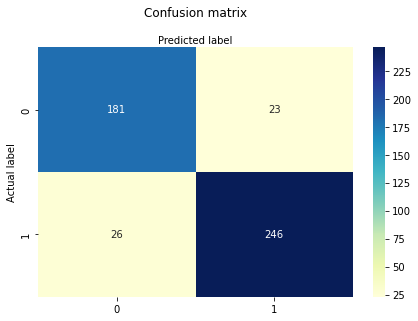

In [112]:

feature_cols = ['People using at least basic drinking water services',
                'Obesity among adults',
                'People practicing open defecation',
                'Individuals using the Internet',
                'GDP per capita',
                'Health expenditure',
                'CO2 emissions',
                'Beer consumption per capita'
               ]
#split dataset in features and target variable
X = df[feature_cols] # Features
y = df['Life Expectancy Rating'] # Target variable

# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=42)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[1,0] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sb.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



from sklearn.metrics import classification_report
target_names = ['High Life Expectancy', 'Low Life Expectancy']
print(classification_report(y_test, y_pred, target_names=target_names))



From The classification above we have accuracy of 0.91 which is good

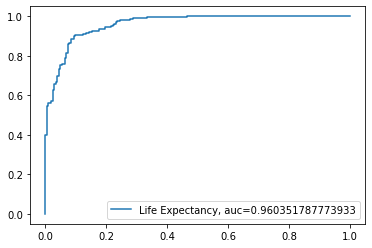

In [113]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Life Expectancy, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Machine Learning - Classification

For classification techniques we use MLP classifier and decision trees. Evaulation was based on accuracy from confusion matrix

# Machine Learning- MLP(Multiple Layered Perceptron) Classification : Evaluated using confusion matrix



Confusion Matrix is 
[[186  18]
 [ 36 236]]


              precision    recall  f1-score   support

           0       0.84      0.91      0.87       204
           1       0.93      0.87      0.90       272

    accuracy                           0.89       476
   macro avg       0.88      0.89      0.89       476
weighted avg       0.89      0.89      0.89       476



5
[array([[ 1.03814976, -1.07471405],
       [-0.17278133, -0.54740927],
       [-0.23236017,  1.38317663],
       [ 0.30464307, -0.14984162],
       [ 1.35630885,  0.13391778],
       [ 0.24144904,  0.16962575],
       [-0.63446681, -0.41032884],
       [ 0.03742366, -0.10633268]]), array([[ 1.44472068e+00,  3.76250151e-65, -6.18804067e-07,
         6.92622298e-03, -3.03456119e-07],
       [ 4.84604844e-02, -1.41049459e-02, -1.61552371e-41,
         8.10478287e-01, -7.35223484e-03]]), array([[ 1.22084501e+00, -1.91454292e-31,  4.00781055e-01,
        -3.17537751e-01, -4.57055291e-04,  1.50563522e-01,
        -1.980

C:\Users\PROGRESSIVE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.

C:\Users\PROGRESSIVE\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



Normalized confusion matrix
[[0.91176471 0.08823529]
 [0.13235294 0.86764706]]


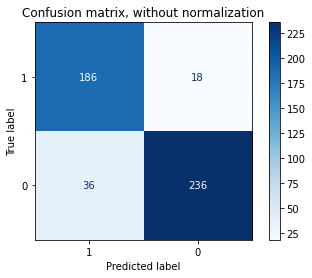

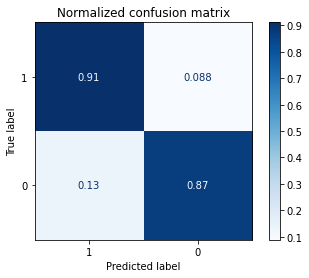

In [114]:
##Building a Neural Networks for Classification Model Using MLP
#This model performs best when all correlating columns are used
#Build the model
#Fit the model
#Evaluate the model using confusion matrix
#Individuals using the Internet',



feature_cols = ['People using at least basic drinking water services',
                'Obesity among adults',
                'People practicing open defecation',
                'Individuals using the Internet',
                'GDP per capita',
                'Health expenditure',
                'CO2 emissions',
                'Beer consumption per capita'
               ]

X = df[feature_cols]
#My refers to my new Life Expectancy Rating column which contains either low or high
y = df['Life Expectancy Rating']
#My classes involved are high or low
class_names = [1,0]

#Train, test and split the dataset. Random number generator, with popular integer see numbers are 0 and 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Pre-processing - transformation, etc...
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Create an MLP model with 4 hidden layers with varying number of perceptrons in each #layer, number of iterations is 500
mlp = MLPClassifier(hidden_layer_sizes=(2,5,7,9),max_iter=2000)


#fit the model
classifier = mlp.fit(X_train,y_train)

#Prediction 
y_pred = mlp.predict(X_test)

print("\n")

#Model Evaluation
#https://scikit-learn.org/stable/modules/model_evaluation.html#clustering-metrics
print("Confusion Matrix is ")
print(confusion_matrix(y_test, y_pred))
print("\n")
print(classification_report(y_test, y_pred))
print("\n")

print("=======================================================")
print(len(mlp.coefs_))
print(mlp.coefs_)
print("\n")
print("=======================================================")
print(len(mlp.intercepts_))
print(mlp.intercepts_)
print("\n")

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()



# Machine Learning - Desicion Tree Classifier (evaulated using confusion matrix)

In [115]:
#Feature selection: split the dataset into features (independent variables) and target (dependent variable)
#Using classifier and confusion matrix evaluation
feature_cols = ['CO2 emissions','Health expenditure','GDP per capita','Military expenditure','People practicing open defecation','People using at least basic drinking water services','Obesity among adults']
X = df[feature_cols] # Features
Y = df['Life Expectancy Rating'] # Target variable

#Function for split dataset will have 3 parameters: features, target, test_set size
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # 70% training and 30% test


#Build Decision Tree Model using Scikit Learn
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


#Evaluate the accuracy of the model (or classifier) for prediction
# Model Accuracy, how often is the classifier correct?
print("\n")
print("Accuracy for 80% training set and 20% test set :",
          metrics.accuracy_score(y_test, y_pred))





#Confusion matrix
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")

cm = confusion_matrix(y_test, y_pred)
tn = cm[0][0]
fn = cm[1][0]
tp = cm[1][1]
fp = cm[0][1]

print("true negative: ", tn)
print("false negative: ", fn)
print("true positive: ", tp)
print("false positive: ", fp)





Accuracy for 80% training set and 20% test set : 0.973753280839895


[[151   3]
 [  7 220]]


true negative:  151
false negative:  7
true positive:  220
false positive:  3


In [116]:
#Evaluating using classifier , the descision tree shows an accuracy of 93%
#Now lets evaluate using a confusion matrix
#Now using confusion matrix we have greater number of true negative and true positive , clearly showing the model is great.
#Now lets visualize the decision tree in the next cell

# Visualizing the  Decision Tree For Regression

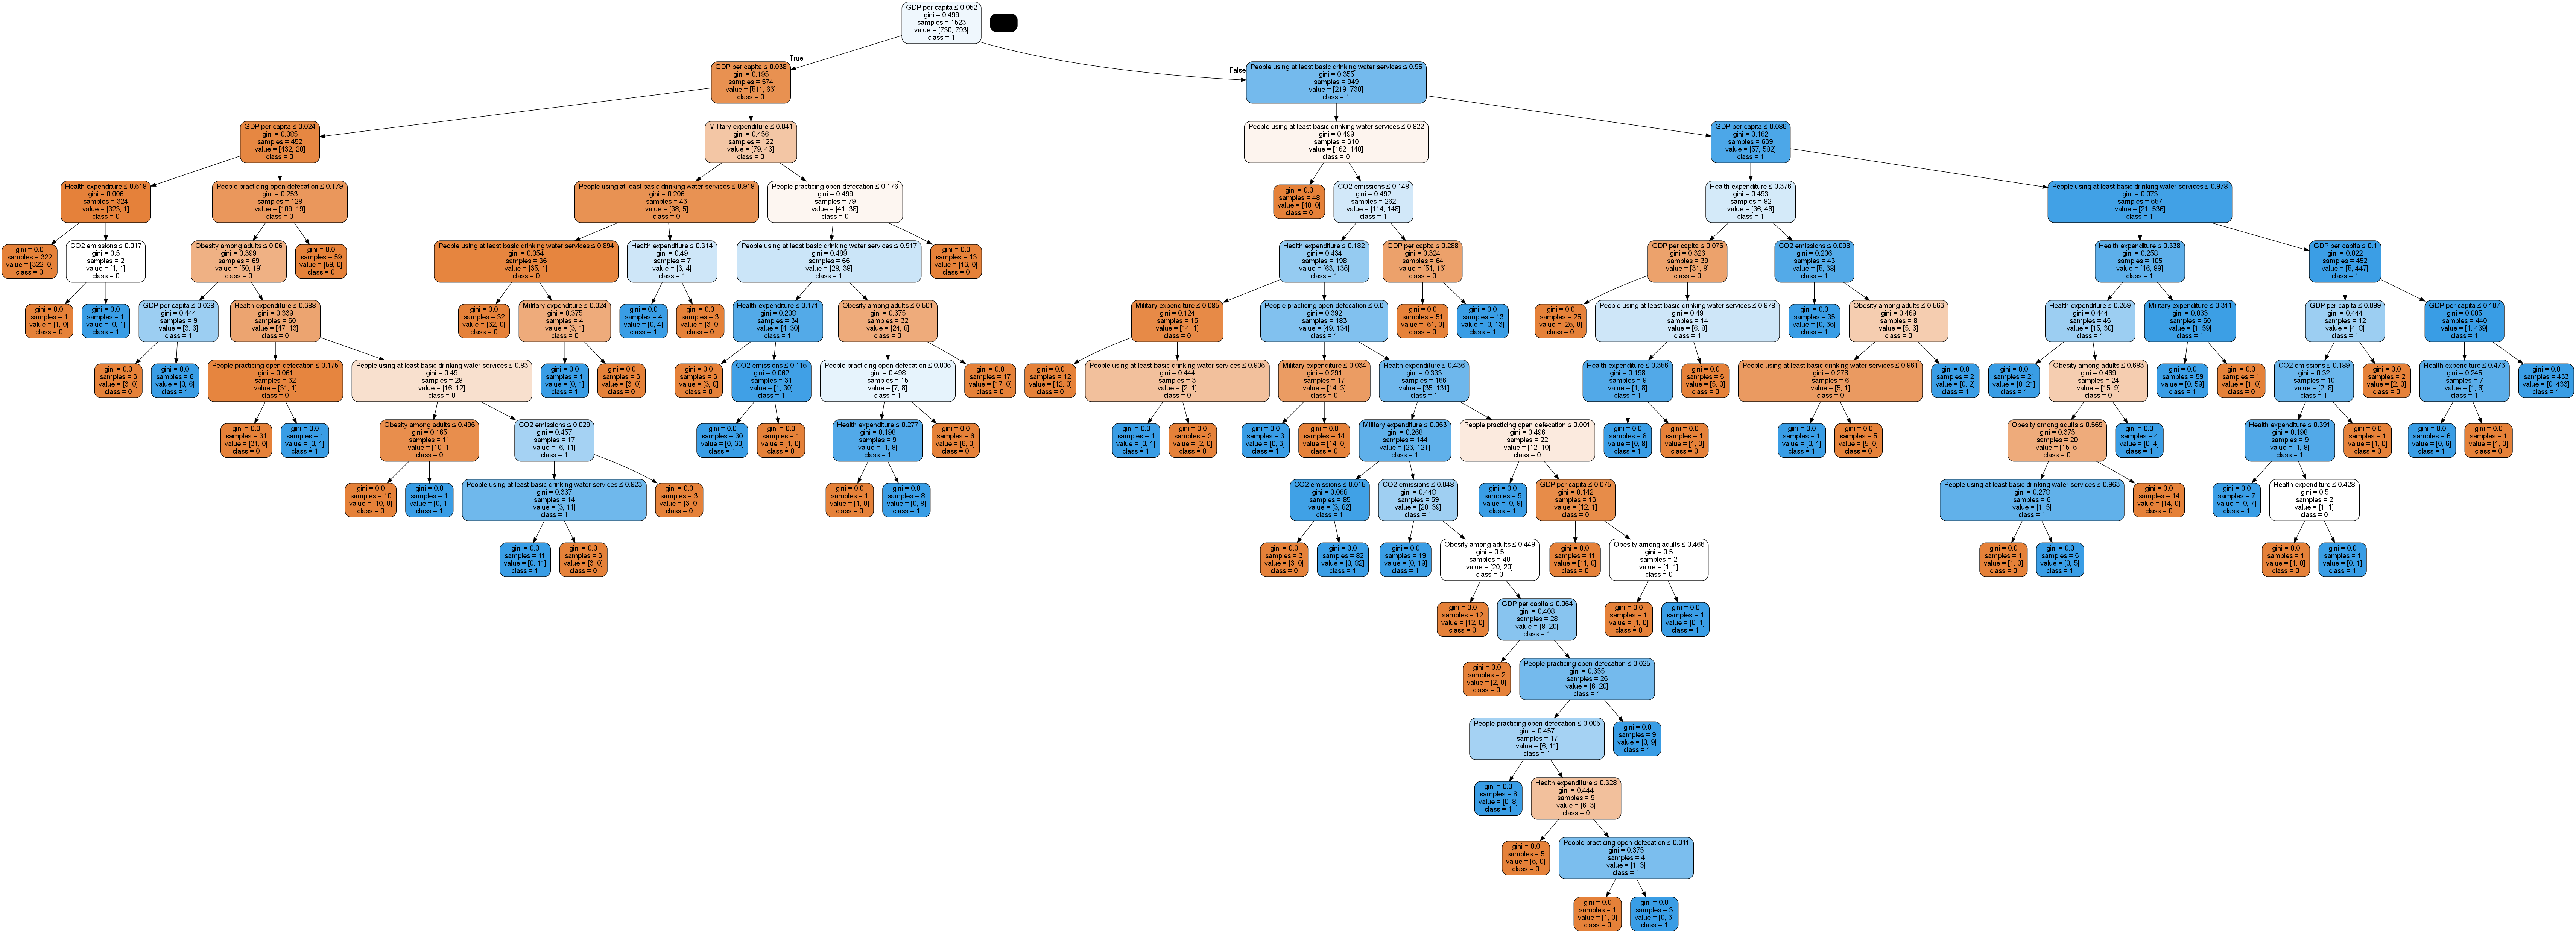

In [117]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Life_Expectancy_decision_Tree.png')
Image(graph.create_png())

# Effort Optimizing Decision Tree Performance

In [118]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy")

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.952755905511811


There was no need to optmize the decision tree because futher change of spiliter or criterion affected the already perfect accuracy we had

# Deep Learning is available on google collab

Link to my analysis on google collab: https://colab.research.google.com/drive/1O3pRhx66T72MDFAnCiikxatdlglW5lS8?usp=sharing

Link to dataset: https://www.kaggle.com/datasets/vrec99/life-expectancy-2000-2015

Original link to dataset: https://data.worldbank.org/indicator/SP.DYN.LE00.IN?locations=XS

Youtube video for Presentation: https://www.youtube.com/watch?v=-k5pXLfhWsI
